In [55]:
import numpy as np
from scipy import interpolate
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [56]:
C0_C1 = 4.59E6
C1_C0 = 4.26e3
C1_C2 = 2.84E7
C2_C1 = 3.26E3
C2_O  = 4.24E3
O_C2  = 9.00E2
C1_C3 = 2.89E3
C3_C1 = 3.92E1
C2_C4 = 1.72E2
C4_C2 = 0.727
O_C5  = 1.77E1
C5_O  = 4.00
C3_C4 = 1.27E6
C4_C3 = 4.57E1
C4_C5 = 1.68E1
C5_C4 = 1.90E2
n_vesicle = 1
n_Glu = n_vesicle * 3000
N_AMPA =  20
Isingle_max = 6 #Gmax * (V - E)

In [57]:
def H(X):
    if X < 0:
        return 0
    else: 
        return 1

def GluA(T):
    A = 1
    tau = 1
    Glu = np.zeros(len(T))
    tspike = [1,5]
    for ts in tspike:
        #print Glu
        Glu += [A*np.exp(-(t-ts)/tau) if t>=ts else 0 for t in T]
    #print Glu
    
    Glu = interpolate.interp1d(T, Glu)
    return Glu

In [58]:
def dAdt(X,t):
    
    C0, C1, C2, C3, C4, C5, O  = X
    try:
        dC0 = - C0_C1*C0*Glu(t) + C1_C0*C1
        dC1 = - C1_C3*C1 + C3_C1*C3 - C1_C2*C1*Glu(t) + C2_C1*C2 + C0_C1*C0*Glu(t) - C1_C0*C1
        dC2 = - C2_O*C2 + O_C2*O - C2_C4*C2 + C4_C2*C4 + C1_C2*C1*Glu(t) - C2_C1*C2
        dC3 = - C3_C4*C3*Glu(t) + C4_C3*C4 + C1_C3*C1 - C3_C1*C3
        dC4 = - C4_C5*C4 + C5_C4*C5 + C3_C4*C3*Glu(t) - C4_C3*C4 + C2_C4*C2 - C4_C2*C4
        dC5 = - C5_O*C5 + O_C5*O + C4_C5*C4 - C5_C4*C5
        #dGlu = - C3_C4*C3*Glu(t) + C4_C3*C4 - C1_C2*C1*Glu(t) + C2_C1*C2 - C0_C1*C0*Glu(t) + C1_C0*C1
        dO = + C5_O*C5 - O_C5*O + C2_O*C2 - O_C2*O
        #print t
        return  dC0, dC1, dC2, dC3, dC4, dC5, dO
    except:
        return 0,0,0,0,0,0,0
    

In [59]:
tmin, tmax, dt = 0, 10, 0.01
T = np.arange(tmin, tmax, dt)
Glu = GluA(T)

A0 = [1, 0, 0, 0, 0, 0, 0]
sol = odeint(dAdt, A0, T)

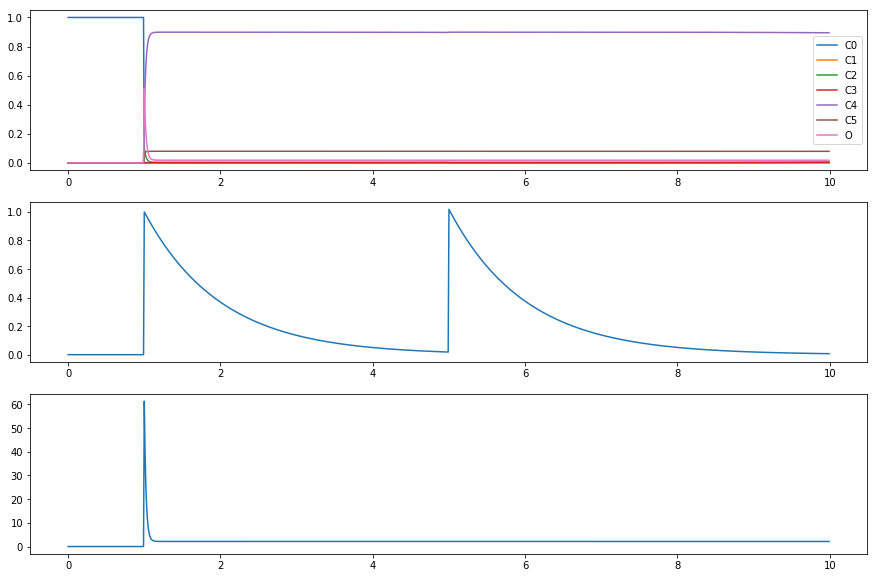

In [60]:
C0, C1, C2, C3, C4, C5, O = sol.T

f = O#max(O)/max(C0)
Iampa = N_AMPA * f * Isingle_max

plt.figure(figsize=(15, 10))

plt.subplot(3,1,1)
plt.plot(T, C0, label = 'C0')
plt.plot(T, C1, label = 'C1')
plt.plot(T, C2, label = 'C2')
plt.plot(T, C3, label = 'C3')
plt.plot(T, C4, label = 'C4')
plt.plot(T, C5, label = 'C5')
plt.plot(T, O, label = 'O')
plt.legend()

plt.subplot(3,1,2)
glu = map(Glu, T)
#print glu
plt.plot(T, glu, label = 'GLu')

plt.subplot(3,1,3)
plt.plot(T, Iampa)
#print Iampa, f